In [1]:
import os

from dask.distributed import Client
from dask.distributed import LocalCluster
from datetime import date
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

import basd

In [2]:
data_path = '/Users/prim232/data/'
gswp3_data_path = os.path.join(data_path, 'gswp3')
mri_data_path = os.path.join(data_path, 'MRI-ESM2-0')
ba_mri_data_path = os.path.join(data_path, 'bias-adjusted', 'MRI-ESM2-gswp3')
basd_mri_data_path = os.path.join(data_path, 'downscaled', 'MRI-ESM2-gswp3')
plot_path = '/Users/prim232/OneDrive - PNNL/Documents/BASD/plots'

In [3]:
tas_fut_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'tas_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
pr_sim_fut = xr.open_mfdataset(os.path.join(mri_data_path, 'pr_*_ssp245_*.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
pr_obs = xr.open_mfdataset(os.path.join(gswp3_data_path, 'pr*.nc4'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
pr_fut_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'pr_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
pr_fut_basd = xr.open_mfdataset(os.path.join(basd_mri_data_path, 'pr_basd_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
hurs_fut_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'hurs_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
rlds_fut_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'rlds_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
rsds_fut_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'rsds_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
sfcWind_fut_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'sfcWind_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
tasrange_mri = xr.open_mfdataset(os.path.join(mri_data_path, 'tasrange_sim_fut.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
tasskew_mri = xr.open_mfdataset(os.path.join(mri_data_path, 'tasskew_sim_fut.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
tasrange_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'tasrange_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
tasskew_ba = xr.open_mfdataset(os.path.join(ba_mri_data_path, 'tasskew_2015-2100.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)
tasskew_gswp3 = xr.open_mfdataset(os.path.join(mri_data_path, 'tasskew_obs_hist.nc'),
                               chunks={'time': 100}).transpose('time', 'lat', 'lon',...)

In [5]:
with LocalCluster(processes=True, threads_per_worker=1) as cluster, Client(cluster) as client:
    print(client.dashboard_link)
    tasskew_sim_coarse = basd.reproject_for_integer_factors(tasskew_gswp3, tasskew_ba, 'tasskew')
    tasskew_sim_coarse.to_netcdf(os.path.join(mri_data_path, 'tasskew_sim_coarse.nc'), encoding={'tasskew': {'zlib': True,
                                                                                                             'shuffle': True,
                                                                                                             'complevel': 5,
                                                                                                             'fletcher32': False,
                                                                                                             'contiguous': False,
                                                                                                             'chunksizes': (1, 180, 360),
                                                                                                             'dtype': 'float32',
                                                                                                             'missing_value': 1e+20,
                                                                                                             '_FillValue': 1e+20
                                                                                                             }})

http://127.0.0.1:8787/status


Task was destroyed but it is pending!
task: <Task pending name='Task-1654' coro=<HTTP1ServerConnection._server_request_loop() running at /Users/prim232/opt/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/tornado/http1connection.py:825> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x1683efc40>()]> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/prim232/opt/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/tornado/ioloop.py:687]>
Task was destroyed but it is pending!
task: <Task pending name='Task-1655' coro=<HTTP1ServerConnection._server_request_loop() running at /Users/prim232/opt/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/tornado/http1connection.py:825> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x1680e6040>()]> cb=[IOLoop.add_future.<locals>.<lambda>() at /Users/prim232/opt/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/tornado/ioloop.py:687]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2793'

In [ ]:
tasskew_sim_coarse

In [11]:
pr_obs.pr.encoding

{'zlib': True,
 'szip': False,
 'zstd': False,
 'bzip2': False,
 'blosc': False,
 'shuffle': True,
 'complevel': 5,
 'fletcher32': False,
 'contiguous': False,
 'chunksizes': (1, 360, 720),
 'source': '/Users/prim232/data/gswp3/pr_gswp3_1961_1970.nc4',
 'original_shape': (3652, 360, 720),
 'dtype': dtype('float32'),
 'missing_value': 1e+20,
 '_FillValue': 1e+20}

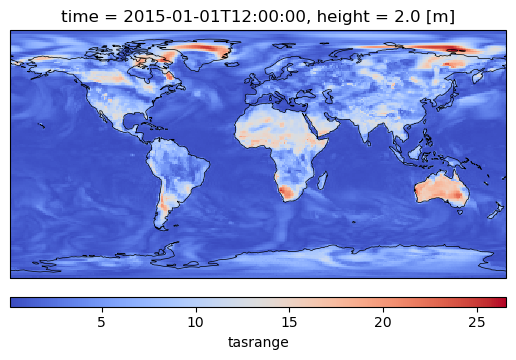

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
tasrange_mri['tasrange'][dict(time=0)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)

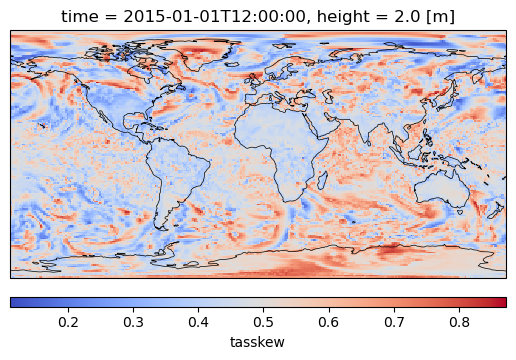

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
tasskew_gswp3['tasskew'][dict(time=-1)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)

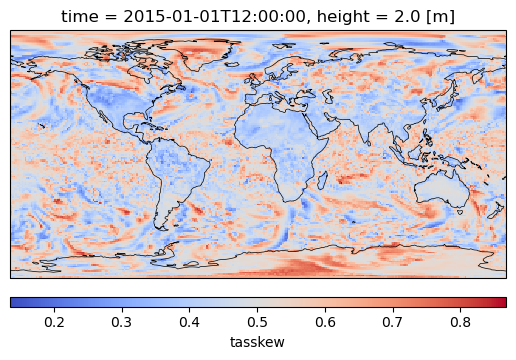

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
tasskew_ba['tasskew'][dict(time=0)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)

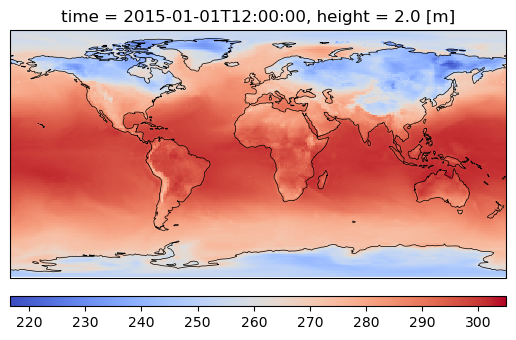

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
(tas_fut_ba['tas'][dict(time=0)] - tasskew_mri['tasskew'][dict(time=0)] * tasrange_mri['tasrange'][dict(time=0)]).plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)

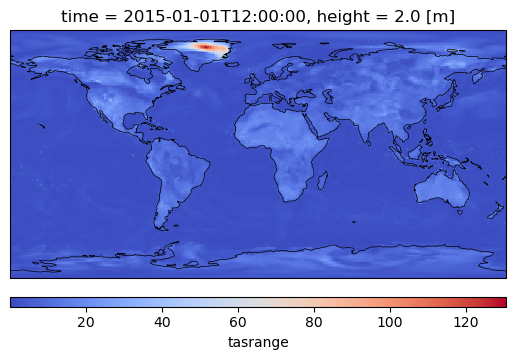

In [19]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
tasrange_ba['tasrange'][dict(time=0)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)

In [13]:
mri_attrs = {
    'sim_input': pr_sim_fut.attrs
}
gswps_attrs = {
    'obs_input': pr_obs.attrs
}
output_attrs = {
    'final_output': {
        'institute': 'Joint Global Change Research / Pacific Northwest National Laboratory',
        'creation_date': date.today().strftime('%m/%d/%Y'),
        'grid': '360 lat x 720 lon (0.5 degrees)',
        'further_info_url': 'https://github.com/JGCRI/basd'
    }
}
nested_dict = mri_attrs | gswps_attrs | output_attrs

for key in nested_dict.keys():
    for sub_key, value in nested_dict[key].items():
        print(f'ncatted -h -a {key}:{sub_key},global,c,c,\'{value}\' pr_basd_2015-2100.nc')

ncatted -h -a sim_input:Conventions,global,c,c,'CF-1.7 CMIP-6.2' pr_basd_2015-2100.nc
ncatted -h -a sim_input:activity_id,global,c,c,'ScenarioMIP' pr_basd_2015-2100.nc
ncatted -h -a sim_input:branch_method,global,c,c,'standard' pr_basd_2015-2100.nc
ncatted -h -a sim_input:branch_time_in_child,global,c,c,'60265.0' pr_basd_2015-2100.nc
ncatted -h -a sim_input:branch_time_in_parent,global,c,c,'60265.0' pr_basd_2015-2100.nc
ncatted -h -a sim_input:creation_date,global,c,c,'2019-05-23T16:08:19Z' pr_basd_2015-2100.nc
ncatted -h -a sim_input:data_specs_version,global,c,c,'01.00.29' pr_basd_2015-2100.nc
ncatted -h -a sim_input:experiment,global,c,c,'update of RCP4.5 based on SSP2' pr_basd_2015-2100.nc
ncatted -h -a sim_input:experiment_id,global,c,c,'ssp245' pr_basd_2015-2100.nc
ncatted -h -a sim_input:external_variables,global,c,c,'areacella' pr_basd_2015-2100.nc
ncatted -h -a sim_input:forcing_index,global,c,c,'1' pr_basd_2015-2100.nc
ncatted -h -a sim_input:frequency,global,c,c,'day' pr_bas

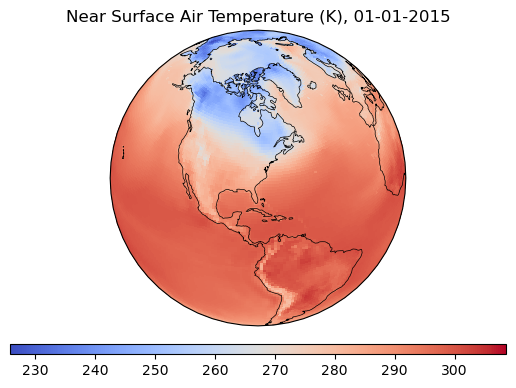

In [4]:
ax = plt.axes(projection=ccrs.Orthographic(-80,35))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
tas_fut_ba['tas'][dict(time=0)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                     cmap='coolwarm',
                                     cbar_kwargs={'label': '',
                                                  'location': 'bottom',
                                                  'aspect': 50,
                                                  'pad': 0.05})
ax.set_title('Near Surface Air Temperature (K), 01-01-2015')
ax.coastlines(linewidth=0.5)
#plt.savefig(os.path.join(plot_path, 'ortho-tas_MRI-ESM2-0_gswp3_01-01-2015.pdf'))
#plt.savefig(os.path.join(plot_path, 'ortho-tas_MRI-ESM2-0_gswp3_01-01-2015.png'),
#            dpi=300, transparent=True)

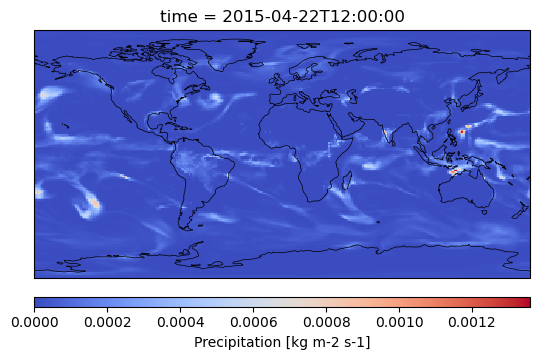

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
pr_fut_ba['pr'][dict(time=111)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)
plt.savefig(os.path.join(plot_path, 'pr_MRI-ESM2-0_gswp3.pdf'))

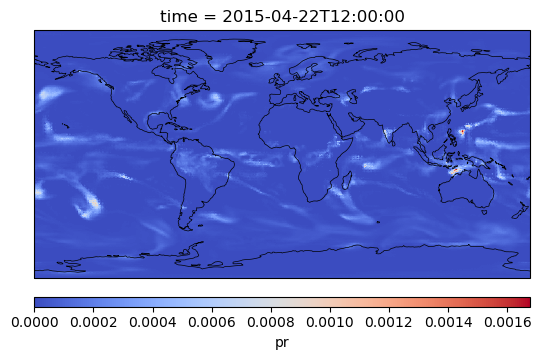

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
pr_fut_basd['pr'][dict(time=111)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)
plt.savefig(os.path.join(plot_path, 'pr_MRI-ESM2-0_gswp3_05.pdf'))

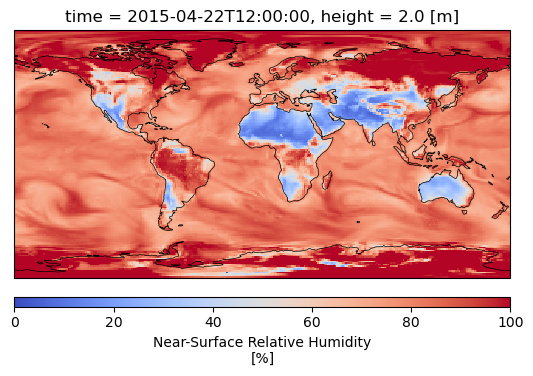

In [19]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
hurs_fut_ba['hurs'][dict(time=111)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)
plt.savefig(os.path.join(plot_path, 'hurs_MRI-ESM2-0_gswp3.pdf'))

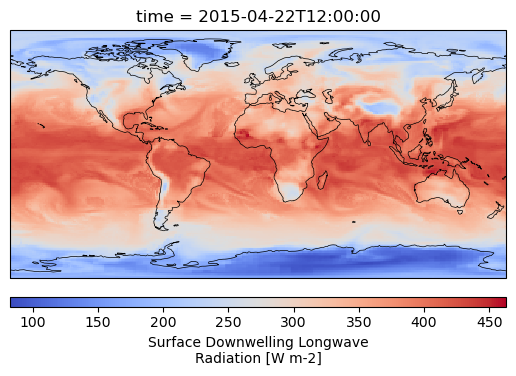

In [20]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
rlds_fut_ba['rlds'][dict(time=111)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)
plt.savefig(os.path.join(plot_path, 'rlds_MRI-ESM2-0_gswp3.pdf'))

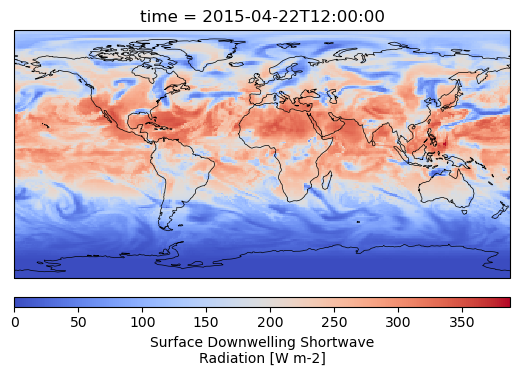

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
rsds_fut_ba['rsds'][dict(time=111)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)
plt.savefig(os.path.join(plot_path, 'rsds_MRI-ESM2-0_gswp3.pdf'))

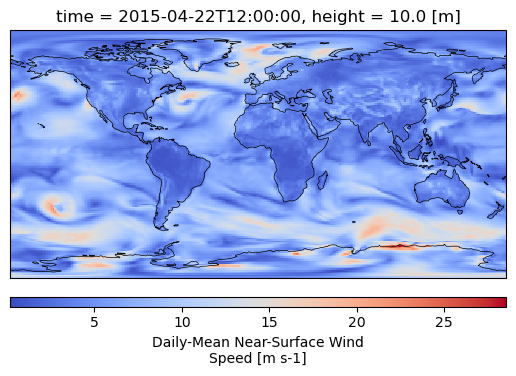

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
sfcWind_fut_ba['sfcWind'][dict(time=111)].plot(ax=ax, transform=ccrs.PlateCarree(),
                                   cmap='coolwarm',
                                   cbar_kwargs={'location': 'bottom',
                                                'aspect': 50,
                                                'pad': 0.05})
ax.coastlines(linewidth=0.5)
plt.savefig(os.path.join(plot_path, 'sfcWind_MRI-ESM2-0_gswp3.pdf'))